# Trying basic LSTM model

In [75]:
import pandas as pd
import numpy as np

In [76]:
data = pd.read_csv("airline_sentiment_analysis.csv")

In [77]:
data.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [78]:
data.shape

(11541, 3)

In [79]:
X = data.text

In [80]:
result = np.where(data.airline_sentiment == "positive", 1, 0)

In [81]:
data['label'] = result

In [82]:
type(data['label'][0])

numpy.int64

In [83]:
y = data.label

In [84]:
y.value_counts()

0    9178
1    2363
Name: label, dtype: int64

In [85]:
import tensorflow as tf

In [86]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

In [87]:
voc_size = 10000

In [88]:
messages = X.copy()
messages

0        @VirginAmerica plus you've added commercials t...
1        @VirginAmerica it's really aggressive to blast...
2        @VirginAmerica and it's a really big bad thing...
3        @VirginAmerica seriously would pay $30 a fligh...
4        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
11536    @AmericanAir my flight was Cancelled Flightled...
11537           @AmericanAir right on cue with the delays👌
11538    @AmericanAir thank you we got on a different f...
11539    @AmericanAir leaving over 20 minutes Late Flig...
11540    @AmericanAir you have my money, you change my ...
Name: text, Length: 11541, dtype: object

In [89]:
import nltk
import re
from nltk.corpus import stopwords

In [90]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
from nltk.stem.porter import PorterStemmer

In [92]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]',' ',messages[i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [93]:
corpus

['virginamerica plu ad commerci experi tacki',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard noth great thing virgin america daystogo',
 'virginamerica flew nyc sfo last week fulli sit seat due two larg gentleman either side help',
 'fli virginamerica',
 'virginamerica know would amazingli awesom bo fll pleas want fli',
 'virginam

In [94]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[5663, 9589, 8179, 4060, 1850, 1886],
 [5663, 3868, 9332, 9243, 8260, 7713, 9952, 8166, 430, 6041, 7966],
 [5663, 3868, 8104, 8786, 4890],
 [5663, 1223, 9289, 6566, 6276, 3482, 8301, 3868, 8786, 4890, 1417, 995],
 [5663, 6239, 5799, 1236, 9869, 1417, 5709, 5891, 8340, 187, 7771],
 [5663, 3362],
 [5663, 1845, 8356, 5028, 3127, 8885],
 [5663, 5668, 2179, 8719, 3051, 9720, 4897, 9838],
 [5663,
  2526,
  9850,
  9415,
  9589,
  3444,
  2200,
  7022,
  430,
  2078,
  4337,
  7060,
  2200,
  3974,
  6709],
 [5663,
  3439,
  1417,
  7770,
  204,
  4894,
  2038,
  4217,
  7035,
  7771,
  5228,
  1375,
  6783,
  8402],
 [5663, 8415],
 [5663, 9302, 3679, 601, 5660, 3705],
 [5663,
  2800,
  4791,
  1578,
  4022,
  6276,
  4160,
  8453,
  6438,
  163,
  2526,
  4890,
  3279,
  1082,
  9660],
 [5663,
  4582,
  6154,
  9302,
  6322,
  2382,
  5540,
  8157,
  3482,
  8809,
  59,
  8118,
  7362,
  9600,
  6712,
  8624],
 [1417, 5663],
 [5663, 6731, 9289, 6422, 5613, 6642, 806, 9865, 7028, 1417],
 [56

In [95]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 4060 1850 1886]
 [   0    0    0 ...  430 6041 7966]
 [   0    0    0 ... 8104 8786 4890]
 ...
 [   0    0    0 ... 3786 6276 2169]
 [   0    0    0 ... 8298 5940 8897]
 [   0    0    0 ... 5239 8262 3993]]


In [96]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 5663, 9589, 8179, 4060, 1850, 1886], dtype=int32)

In [98]:
len(embedded_docs),y.shape

(11541, (11541,))

In [99]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [100]:
X_final.shape,y_final.shape

((11541, 20), (11541,))

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,x_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.30,random_state=42, stratify=y_final)

# Trying logistic regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
clf = LogisticRegression(random_state=42)

In [105]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [106]:
clf_predict = clf.predict(x_test)

In [107]:
print(confusion_matrix(y_test,clf_predict))

[[2743   11]
 [ 674   35]]


In [109]:
accuracy_score(clf_predict,y_test)

0.8021946289344499

In [110]:
print(classification_report(clf_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      3417
           1       0.05      0.76      0.09        46

    accuracy                           0.80      3463
   macro avg       0.52      0.78      0.49      3463
weighted avg       0.98      0.80      0.88      3463



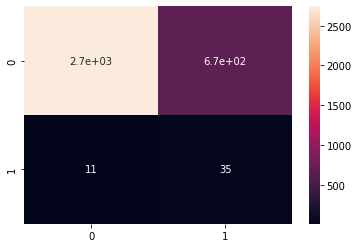

In [111]:
sns.heatmap(confusion_matrix(clf_predict,y_test), annot=True)

# Trying LSTM

In [97]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
127/127 [==============================] - 17s 95ms/step - loss: 0.3932 - accuracy: 0.8406 - val_loss: 0.2323 - val_accuracy: 0.9044
Epoch 2/10
127/127 [==============================] - 10s 78ms/step - loss: 0.1773 - accuracy: 0.9302 - val_loss: 0.2235 - val_accuracy: 0.9134
Epoch 3/10
127/127 [==============================] - 8s 65ms/step - loss: 0.1174 - accuracy: 0.9579 - val_loss: 0.2463 - val_accuracy: 0.9070
Epoch 4/10
127/127 [==============================] - 8s 65ms/step - loss: 0.0851 - accuracy: 0.9709 - val_loss: 0.3583 - val_accuracy: 0.8978
Epoch 5/10
127/127 [==============================] - 8s 65ms/step - loss: 0.0634 - accuracy: 0.9787 - val_loss: 0.3400 - val_accuracy: 0.8955
Epoch 6/10
127/127 [==============================] - 8s 66ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.4022 - val_accuracy: 0.8865
Epoch 7/10
127/127 [==============================] - 8s 67ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.3827 - val_accuracy: 0.89

# Trying with dropout layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
# Creating model with dropout
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
253/253 [==============================] - 15s 43ms/step - loss: 0.3380 - accuracy: 0.8625 - val_loss: 0.2322 - val_accuracy: 0.9059
Epoch 2/20
253/253 [==============================] - 10s 38ms/step - loss: 0.1833 - accuracy: 0.9322 - val_loss: 0.2271 - val_accuracy: 0.9116
Epoch 3/20
253/253 [==============================] - 10s 39ms/step - loss: 0.1293 - accuracy: 0.9523 - val_loss: 0.2417 - val_accuracy: 0.9111
Epoch 4/20
253/253 [==============================] - 10s 39ms/step - loss: 0.1002 - accuracy: 0.9632 - val_loss: 0.2751 - val_accuracy: 0.9079
Epoch 5/20
253/253 [==============================] - 10s 39ms/step - loss: 0.0805 - accuracy: 0.9717 - val_loss: 0.2983 - val_accuracy: 0.9041
Epoch 6/20
253/253 [==============================] - 10s 40ms/step - loss: 0.0656 - accuracy: 0.9772 - val_loss: 0.2938 - val_accuracy: 0.8874
Epoch 7/20
253/253 [==============================] - 10s 40ms/step - loss: 0.0538 - accuracy: 0.9822 - val_loss: 0.3542 - val_accuracy:

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype("int64")

109/109 [==============================] - 2s 8ms/step


In [ ]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [66]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[2612  142]
 [ 246  463]]


In [67]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.8879584175570314

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2858
           1       0.65      0.77      0.70       605

    accuracy                           0.89      3463
   macro avg       0.80      0.84      0.82      3463
weighted avg       0.90      0.89      0.89      3463



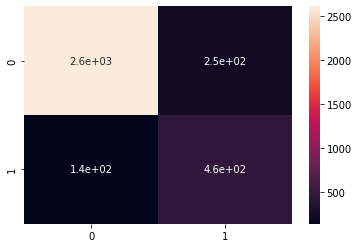

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_pred,y_test), annot=True)

In [ ]:
model.save("model.h5")